# Hotel Reservations Cancellation Prediction

The objective of this project is to predict the likelihood of customer cancellations by examining various features and variables associated with reservations.


### Data Dictionary

| Column Name | Description |
| --- | --- |
|Booking_ID|unique identifier of each booking|
|no_of_adults|number of adults|
|no_of_children|number of children|
|no_of_weekend_nights|number of weekend nights  (Saturday or Sunday) the guest stayed or booked to stay at the hotel|
|no_of_week_nights|number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|meal_type|meal type booked by the customer|
|required_car_parking_spaces| Does the customer require a car parking space? (0 - No, 1- Yes)|
|lead_time|Number of days between the date of booking and the arrival date|
|arrival_year|Year of arrival|
|arrival_month|Month of arrival|
|arrival_date|Date of arrival|
|market_segment|Market segment designation|
|repeated_guest| Is the customer a repeated guest? (0 - No, 1- Yes)|
|no_previous_cancellations| Number of previous bookings that were canceled by the customer prior to the current booking|
|previous_bookings_not_canceled|Number of previous bookings not canceled by the customer prior to the current booking|
|avg_price_per_room|Average price per day of the reservation; prices of the rooms are dynamic. (in euros)|
|no_of_special_requests|Total number of special requests made by the customer (e.g. high floor, view from the room, etc)|
|booking_status|Flag indicating if the booking was canceled or not|

In [17]:
import numpy as np 
import pandas as pd    
import matplotlib.pyplot as plt  
import seaborn as sns  

In [18]:
data = pd.read_csv("Hotel Reservations.csv")
data.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


# Data Preprocessing Part 1

In [19]:
#Identifying the shape of data set
print(data.shape)

(36275, 19)


In [20]:
#Dropping the identifier column
data.drop(['Booking_ID'], axis=1, inplace=True)

Now im combining the year, month and day columns into a single column for date of arrival in year month day format (yyyy/mm/dd).

In [21]:
data['date_of_arrival'] = data["arrival_year"].astype(str) + '/' + data["arrival_month"].astype(str) + '/' + data["arrival_date"].astype(str)

# Typecasting the above date column (str) into a datetime instance

data['date_of_arrival'] = pd.to_datetime(data['date_of_arrival'],format='mixed', errors='coerce',yearfirst=True)


#dropping the columns
data.drop(columns=['arrival_date', 'arrival_month', 'arrival_year'], inplace=True)

data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11


In [22]:
#checking for null values
data.isnull().sum()

no_of_adults                             0
no_of_children                           0
no_of_weekend_nights                     0
no_of_week_nights                        0
type_of_meal_plan                        0
required_car_parking_space               0
room_type_reserved                       0
lead_time                                0
market_segment_type                      0
repeated_guest                           0
no_of_previous_cancellations             0
no_of_previous_bookings_not_canceled     0
avg_price_per_room                       0
no_of_special_requests                   0
booking_status                           0
date_of_arrival                         37
dtype: int64

In [23]:
# dropping the null values in the date column
data.dropna(inplace=True)
data.reset_index(drop = True,inplace=True)

In [24]:
data.isnull()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36233,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36234,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36235,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
data.tail()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival
36233,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03
36234,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Online,0,0,0,90.95,2,Canceled,2018-10-17
36235,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01
36236,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,Canceled,2018-04-21
36237,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,Offline,0,0,0,161.67,0,Not_Canceled,2018-12-30


In [28]:
# checking for unique values in each column
data.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3919
no_of_special_requests                     6
booking_status                             2
date_of_arrival                          549
dtype: int64

In [30]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,date_of_arrival
count,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238
mean,1.845301,0.105221,0.810475,2.204206,0.030934,85.275070,0.025553,0.023346,0.152961,103.437259,0.619957,2018-05-24 16:37:29.130746880
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017-07-01 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.518572,0.402540,0.870992,1.410784,0.173142,85.953561,0.157801,0.368483,1.753366,35.084264,0.786403,NaN


Here the minimum average price per room and number of adults is zero, which is not possible so, I will replace the price with with mean value and drop the rows with zero adults.

In [31]:
# Replacing the average price per room with mean value. 
data["avg_price_per_room"].replace(0,data["avg_price_per_room"].mean(),inplace=True)

In [32]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,date_of_arrival
count,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238
mean,1.845301,0.105221,0.810475,2.204206,0.030934,85.275070,0.025553,0.023346,0.152961,104.992900,0.619957,2018-05-24 16:37:29.130746880
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,2017-07-01 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,81.000000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,100.000000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.518572,0.402540,0.870992,1.410784,0.173142,85.953561,0.157801,0.368483,1.753366,32.673687,0.786403,NaN


In [33]:
# Dropping the rows containing number of adults as value 0

filter = (data['no_of_adults']==0)
data.drop(index=data[filter].index, inplace=True )

In [34]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,date_of_arrival
count,36099.000000,36099.000000,36099.000000,36099.000000,36099.000000,36099.000000,36099.000000,36099.000000,36099.000000,36099.000000,36099.000000,36099
mean,1.852406,0.097814,0.810022,2.203496,0.031026,85.224715,0.025652,0.023436,0.153550,105.071682,0.618715,2018-05-24 13:23:21.047120384
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,2017-07-01 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,81.000000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,100.000000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.150000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.506745,0.384964,0.870868,1.410714,0.173390,85.974298,0.158096,0.369189,1.756713,32.648687,0.785732,NaN


# EDA
In EDA step, I will be visualizing the data to get a better understanding of the dataset and to see if there are any trends or patterns in the data. First I will begin with looking at the distribution of the data and then I will look at the relationship between the independent variables and the target variable.

# Guest Information


Text(0.5, 1.0, 'Number of Children')

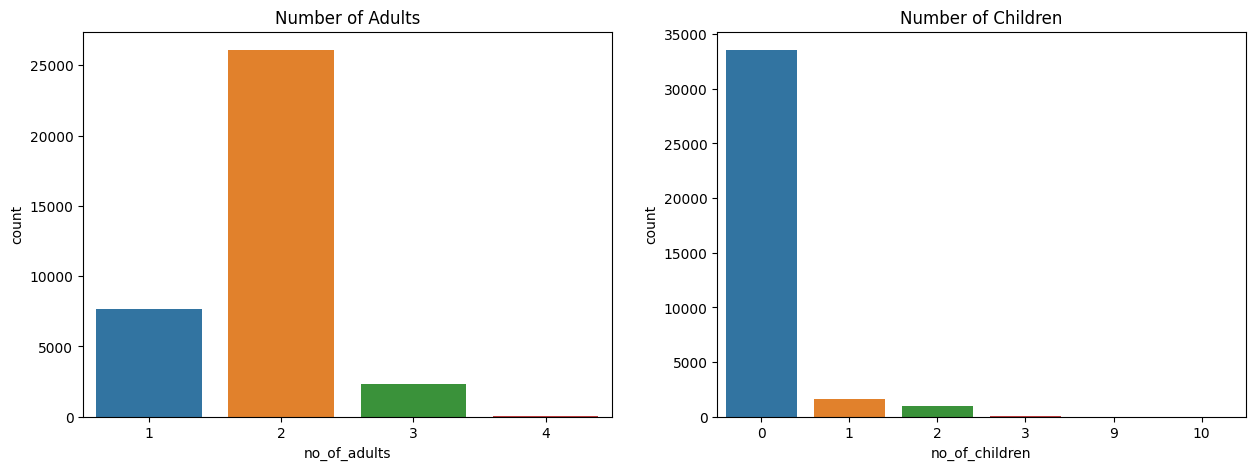

In [42]:
fig,ax = plt.subplots(1,2,figsize = (15,5))

sns.countplot(x ="no_of_adults" ,data = data,ax = ax[0]).set_title("Number of Adults")
sns.countplot( x = "no_of_children",data = data,ax =ax[1]).set_title("Number of Children")

 The graph above displays the distribution of guest information, including the number of adults and children. It is evident from the graph that the majority of reservations were made by two adults with no children, which leads to the assumption that most of these reservations were made by couples. The second most common reservation consists of a single adult with no children, which could imply that these reservations were primarily made for business purposes. I also assume that the remaining reservations were made by families, as they include 1 or 2 children, likely for sightseeing purposes

# Time spent at Hotel

Text(0.5, 1.0, 'Number of week nights')

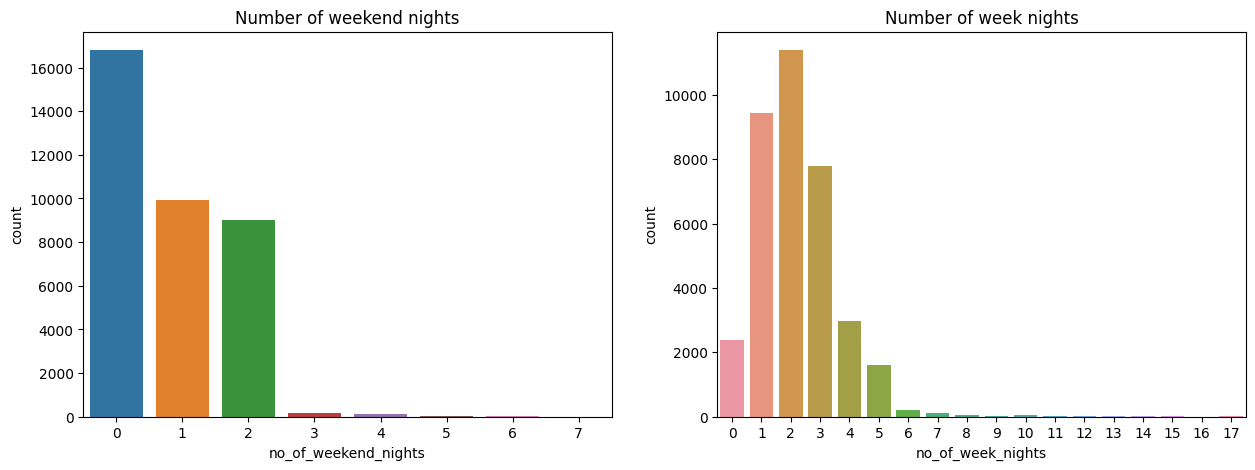

In [44]:
fig,ax = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x = "no_of_weekend_nights",data = data,ax = ax[0]).set_title("Number of weekend nights")
sns.countplot(x = "no_of_week_nights",data = data,ax = ax[1]).set_title("Number of week nights")

These graphs show that the majority of reservations were made by guests for non-weekend nights, with most of these bookings being for 1 or 2 nights; additionally, a significant number of reservations were made for weekend nights, also for 1 or 2 nights, leading to the assumption that the reservations made for weekends were primarily for vacation purposes, while those for weekdays were likely for business trips or other reasons.

# Date of Arrival

In [57]:
year = data["date_of_arrival"].dt.year
year.value_counts()

date_of_arrival
2018    29595
2017     6504
Name: count, dtype: int64

Text(0.5, 1.0, 'Week of arrival')

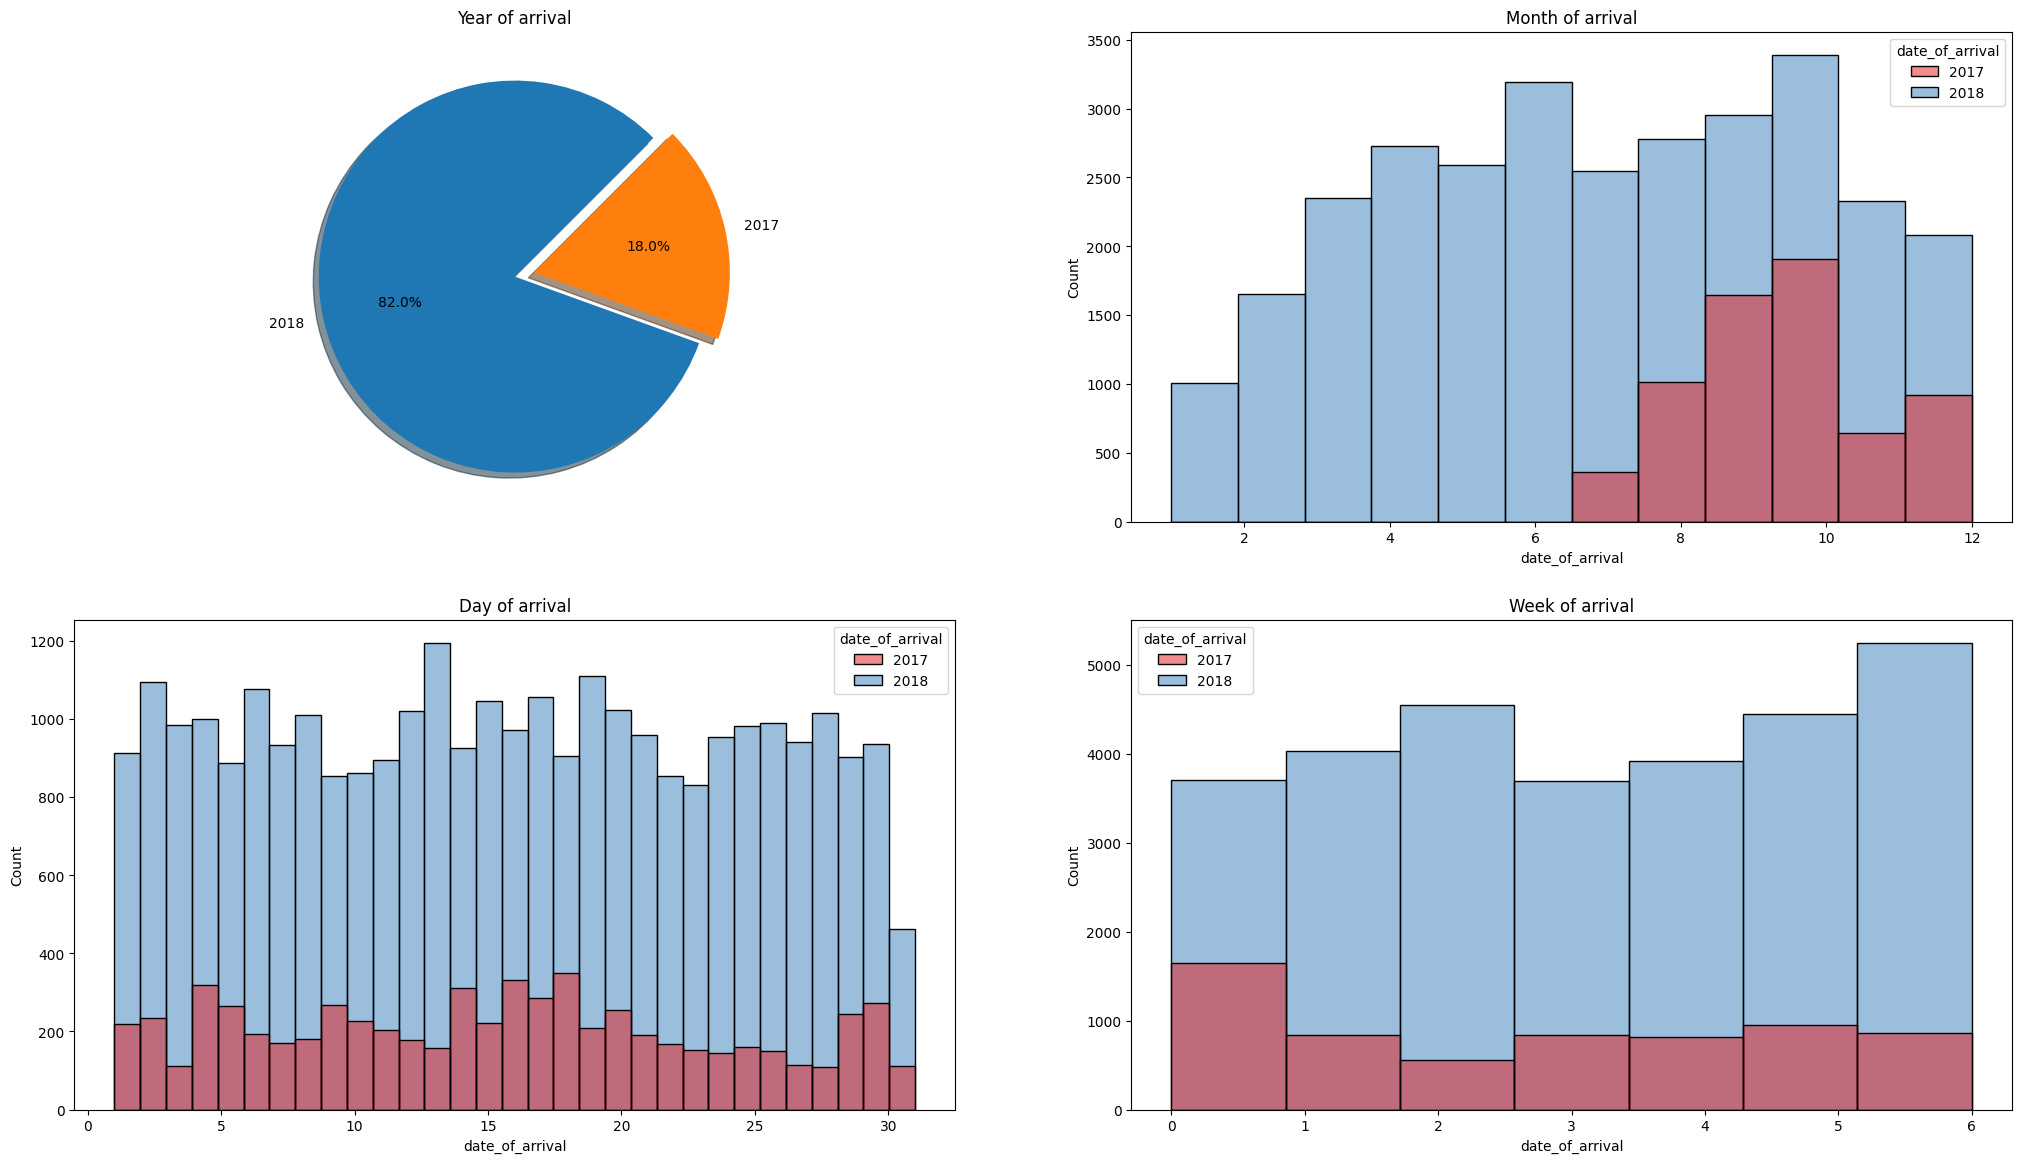

In [69]:
fig,ax = plt.subplots(2,2,figsize = (25,14))

ax[0,0].pie(data["date_of_arrival"].dt.year.value_counts(),labels = [2018,2017],explode = (0,0.1), autopct='%1.1f%%', shadow=True, startangle=45)
ax[0,0].set_title('Year of arrival')

sns.histplot(x = data["date_of_arrival"].dt.month,ax = ax[0,1],bins = 12,hue = data['date_of_arrival'].dt.year, palette = 'Set1').set_title("Month of arrival")


sns.histplot(x = data["date_of_arrival"].dt.day,ax = ax[1,0],bins = 31,hue = data['date_of_arrival'].dt.year, palette = 'Set1').set_title("Day of arrival")


sns.histplot(x = data["date_of_arrival"].dt.day_of_week,ax = ax[1,1],bins = 7,hue = data['date_of_arrival'].dt.year, palette = 'Set1').set_title("Week of arrival")

These graphs provide information about reservations made by guests on specific dates, including the day, month, and year. In the dataset, the majority of reservations were made in the year 2018, accounting for 82%. In both years, the month of October had the highest number of reservations compared to other months. In 2017, there were nearly 2000 bookings in October, while in 2018, there were nearly 3500. Additionally, June had the second-highest number of bookings after October in 2018.

When looking at specific days of the month, in 2017, the 4th, 14th, 16th, and 18th days had the most reservations. In 2018, it was the 2nd, 7th, 14th, and 19th days that had the most reservations. Regarding the days of the week, Mondays had the highest number of reservations in 2017, while Sundays had the highest number of reservations in 2018.

From these visualizations, we can conclude that more bookings were made in June and October, particularly during the second and third weeks and on weekends.

# Services


Text(0.5, 1.0, 'Number of special requests')

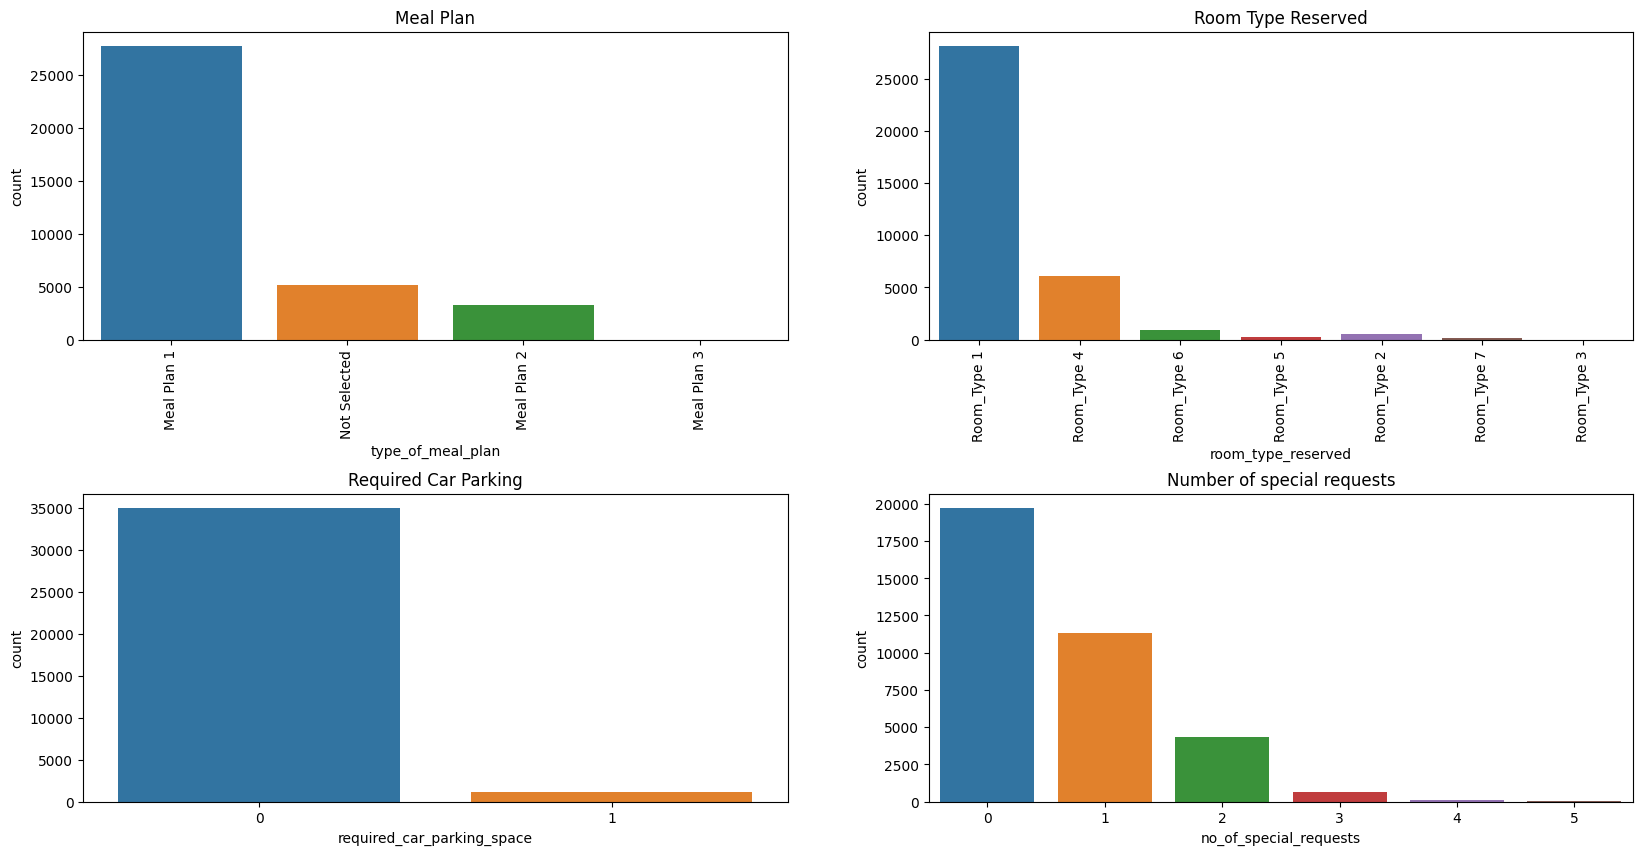

In [71]:
fig,ax = plt.subplots(2,2,figsize = (20,10))
fig.subplots_adjust(hspace=0.5)

sns.countplot(x = 'type_of_meal_plan', data = data, ax=ax[0,0]).set_title('Meal Plan')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'room_type_reserved', data = data, ax=ax[0,1]).set_title('Room Type Reserved')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'required_car_parking_space', data = data, ax=ax[1,0]).set_title('Required Car Parking')

sns.countplot(x = 'no_of_special_requests', data = data, ax=ax[1,1]).set_title('Number of special requests')



The above graphs display the types of services that guests selected when making reservations at the hotel. The majority of reservations were made for Room Type 1 and Meal Plan 1. Only a few reservations included a request for car parking space, suggesting that most guests likely used public transport or taxis to reach the hotel. Furthermore, a significant number of reservations were made without specifying a particular meal plan, indicating that these guests might have dined outside the hotel.

Additionally, Room Type 4 was the second most frequently reserved room type by guests, while Room Type 3 was the least reserved. Similarly, Meal Plan 3 was the least reserved meal plan.

# Lead time (days between date of reservation and date of arrival)

Text(0.5, 1.0, 'Lead Time in days')

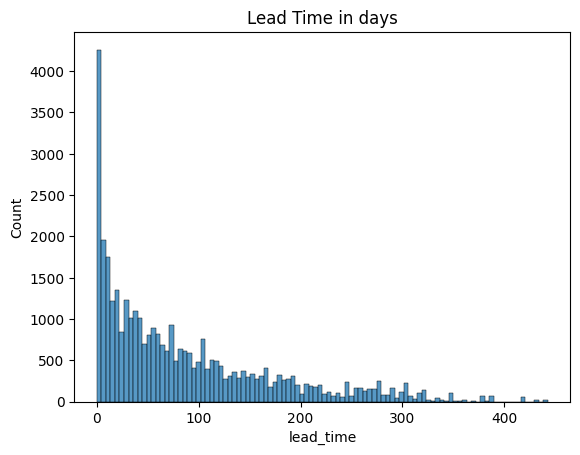

In [72]:
sns.histplot(x = 'lead_time', data = data, bins=100).set_title('Lead Time in days')

The graph reveals that a significant number of reservations were made either on the day of arrival or just one day before. Additionally, a majority of reservations were booked within 1 to 2 weeks prior to the arrival date. Interestingly, there were also reservations made 2 to 3 months in advance.

Based on this histogram, I've formulated a hypothesis: guests who book with very little lead time, such as on the same day or a day before, are less likely to cancel their reservations compared to guests who plan well in advance

# Market Segment

Text(0.5, 1.0, 'Market Segment Type')

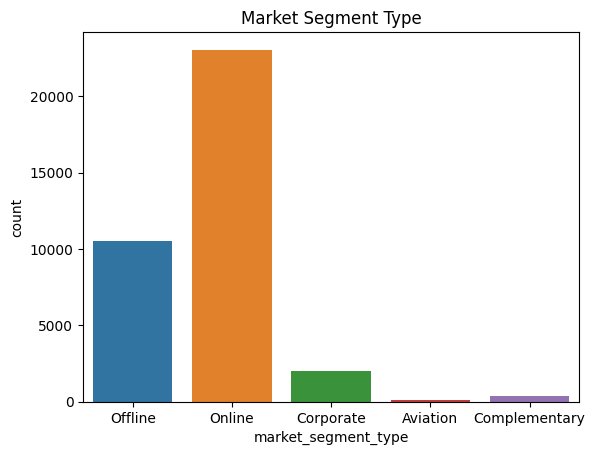

In [74]:
sns.countplot(x = 'market_segment_type', data = data).set_title('Market Segment Type')

This graph illustrates the primary channels through which reservations were made at the hotel. The majority of reservations were completed through online platforms, indicating that the hotel company has a significant presence on travel booking websites. The second most common method of booking was offline, which could occur either upon arrival at the hotel or through a travel agent. The third most prevalent booking method was corporate, often made on behalf of employees by their respective companies. There were very few bookings attributed to aviation companies, hinting at the possibility of an airport in proximity to the hotel.

# Guest's previous experience with the hotel

Text(0.5, 1.0, 'Number of Previous Bookings Not Cancelled')

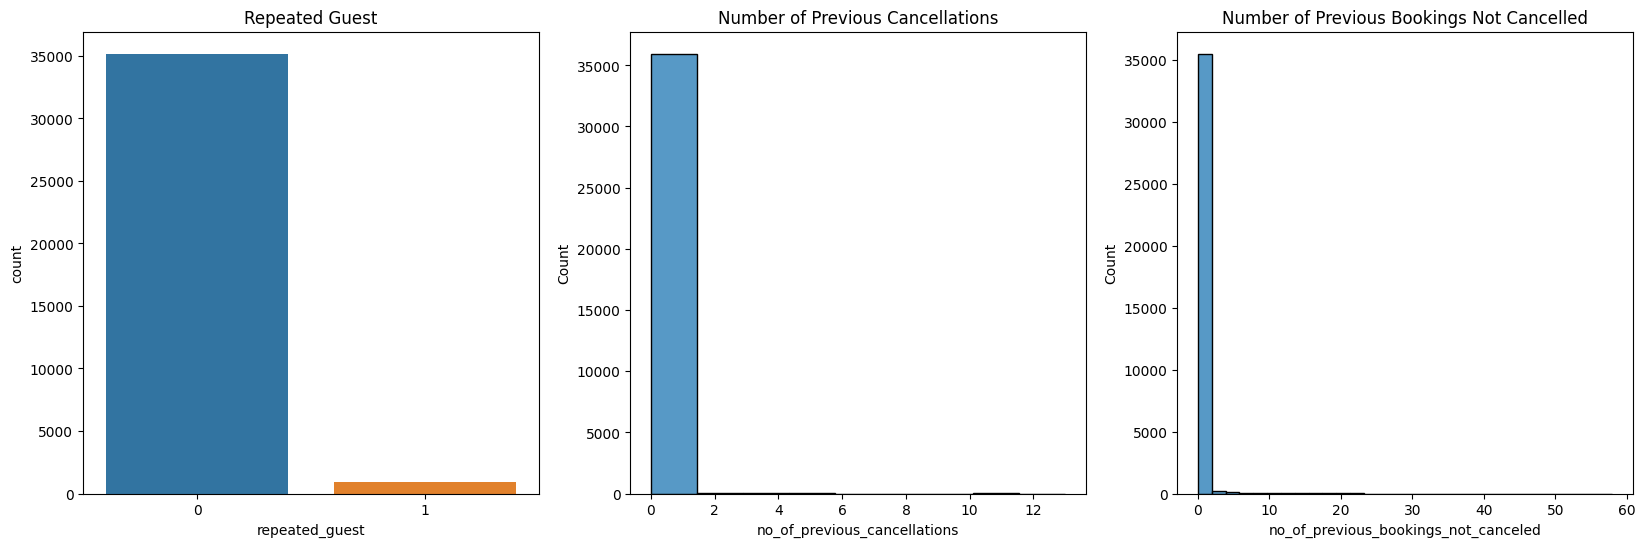

In [75]:
fig, ax = plt.subplots(1,3,figsize=(20,6))

sns.countplot(x = 'repeated_guest', data = data, ax=ax[0]).set_title('Repeated Guest')

sns.histplot(x = 'no_of_previous_cancellations', data = data, ax=ax[1], bins = 9).set_title('Number of Previous Cancellations')

sns.histplot(x = 'no_of_previous_bookings_not_canceled', data = data, ax=ax[2], bins = 30).set_title('Number of Previous Bookings Not Cancelled')

The majority of reservations made at the hotel are from new guests, with very few being repeat guests. This underscores a potential issue with customer retention at the hotel. To address this, the hotel should prioritize providing excellent services to guests to encourage return visits. As most of the guests are new, a significant portion of the dataset shows zero previous booking cancellations. However, upon closer inspection, it becomes evident that some guests have indeed canceled their previous bookings

# Average room price

Text(0.5, 1.0, 'Average Room Price')

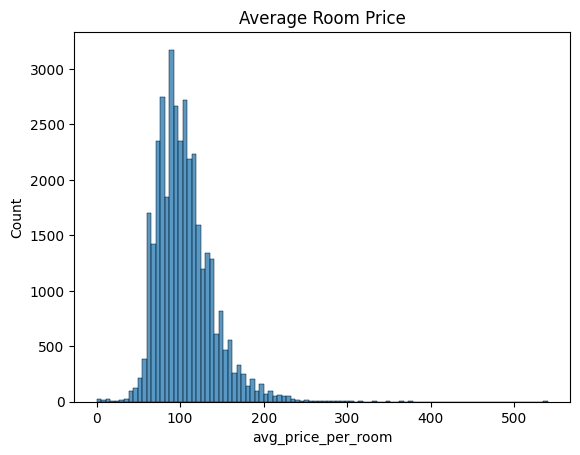

In [76]:
sns.histplot(x="avg_price_per_room",data=data,bins = 100).set_title("Average Room Price")

The graph displays the distribution of room prices in pounds (£). The majority of reservations had room prices ranging from £75 to £150, while only a small number of reservations featured room prices exceeding £200.

### Up to this point, I've visualized the data distribution across various variables and formed some hypotheses. Now, I'll examine how the independent variables relate to the target variable to validate these hypotheses

# Guest Information and Cancellation

Text(0.5, 1.0, 'Number of Children')

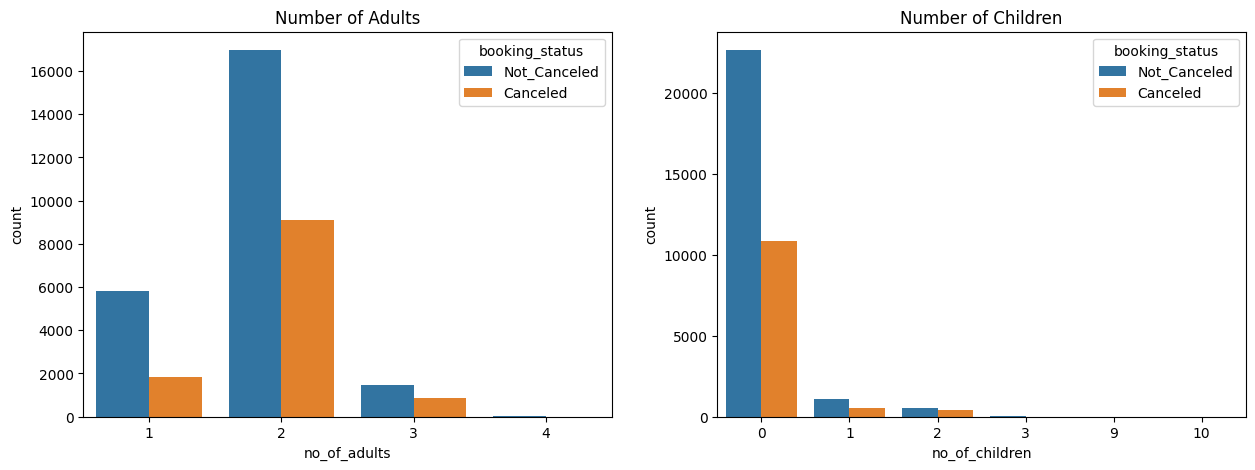

In [78]:
fig,ax = plt.subplots(1,2,figsize = (15,5))
sns.countplot( x = 'no_of_adults', data = data, ax=ax[0], hue= 'booking_status').set_title('Number of Adults')
sns.countplot( x = 'no_of_children', data = data, ax=ax[1], hue = 'booking_status').set_title('Number of Children')

The majority of reservation cancellations occurred when the reservation was made for two adults, most likely without any children. The second most common type of cancellation was associated with reservations made for one adult. However, the number of cancellations decreased when the reservation included children or had more than two adults."







# Time Spent at Hotel and Cancellation

Text(0.5, 1.0, 'Number of Week Nights')

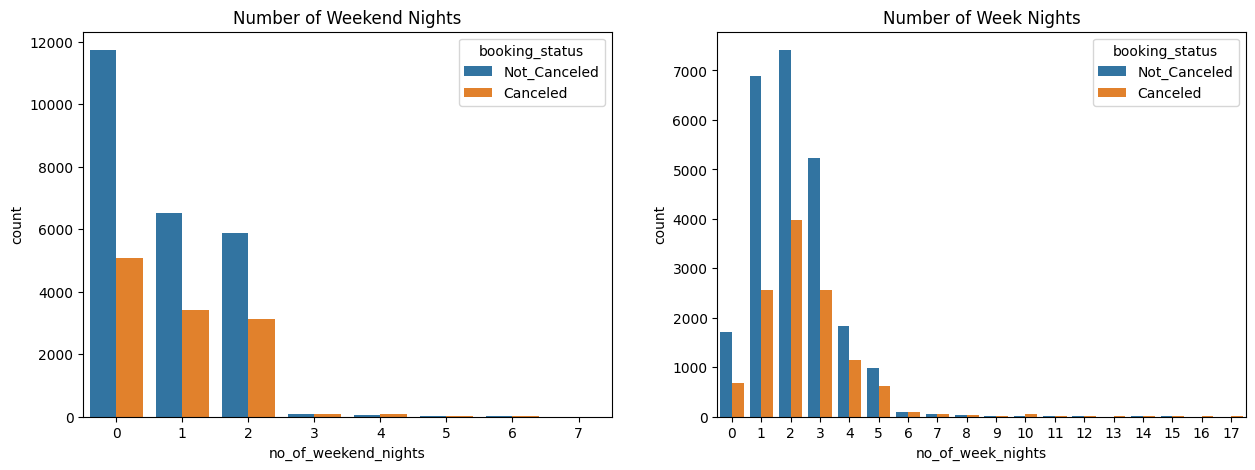

In [79]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'no_of_weekend_nights', data = data, ax=ax[0], hue = 'booking_status').set_title('Number of Weekend Nights')
sns.countplot(x = 'no_of_week_nights', data = data, ax=ax[1], hue = 'booking_status').set_title('Number of Week Nights')

These graphs uncover some interesting patterns when it comes to reservation cancellations. It appears that reservations made for one or two weekend nights are less likely to be canceled. On the other hand, reservations for two weekdays have the highest cancellation rate, followed by reservations for one and three weekdays. This implies that guests might be more inclined to cancel their reservations if they're planning a stay during the weekdays for less than three days. However, the rate of cancellations is lower for weekend reservations.

# Date of Arrival and Cancellation

Text(0.5, 1.0, 'Cancellation by day of week in 2018')

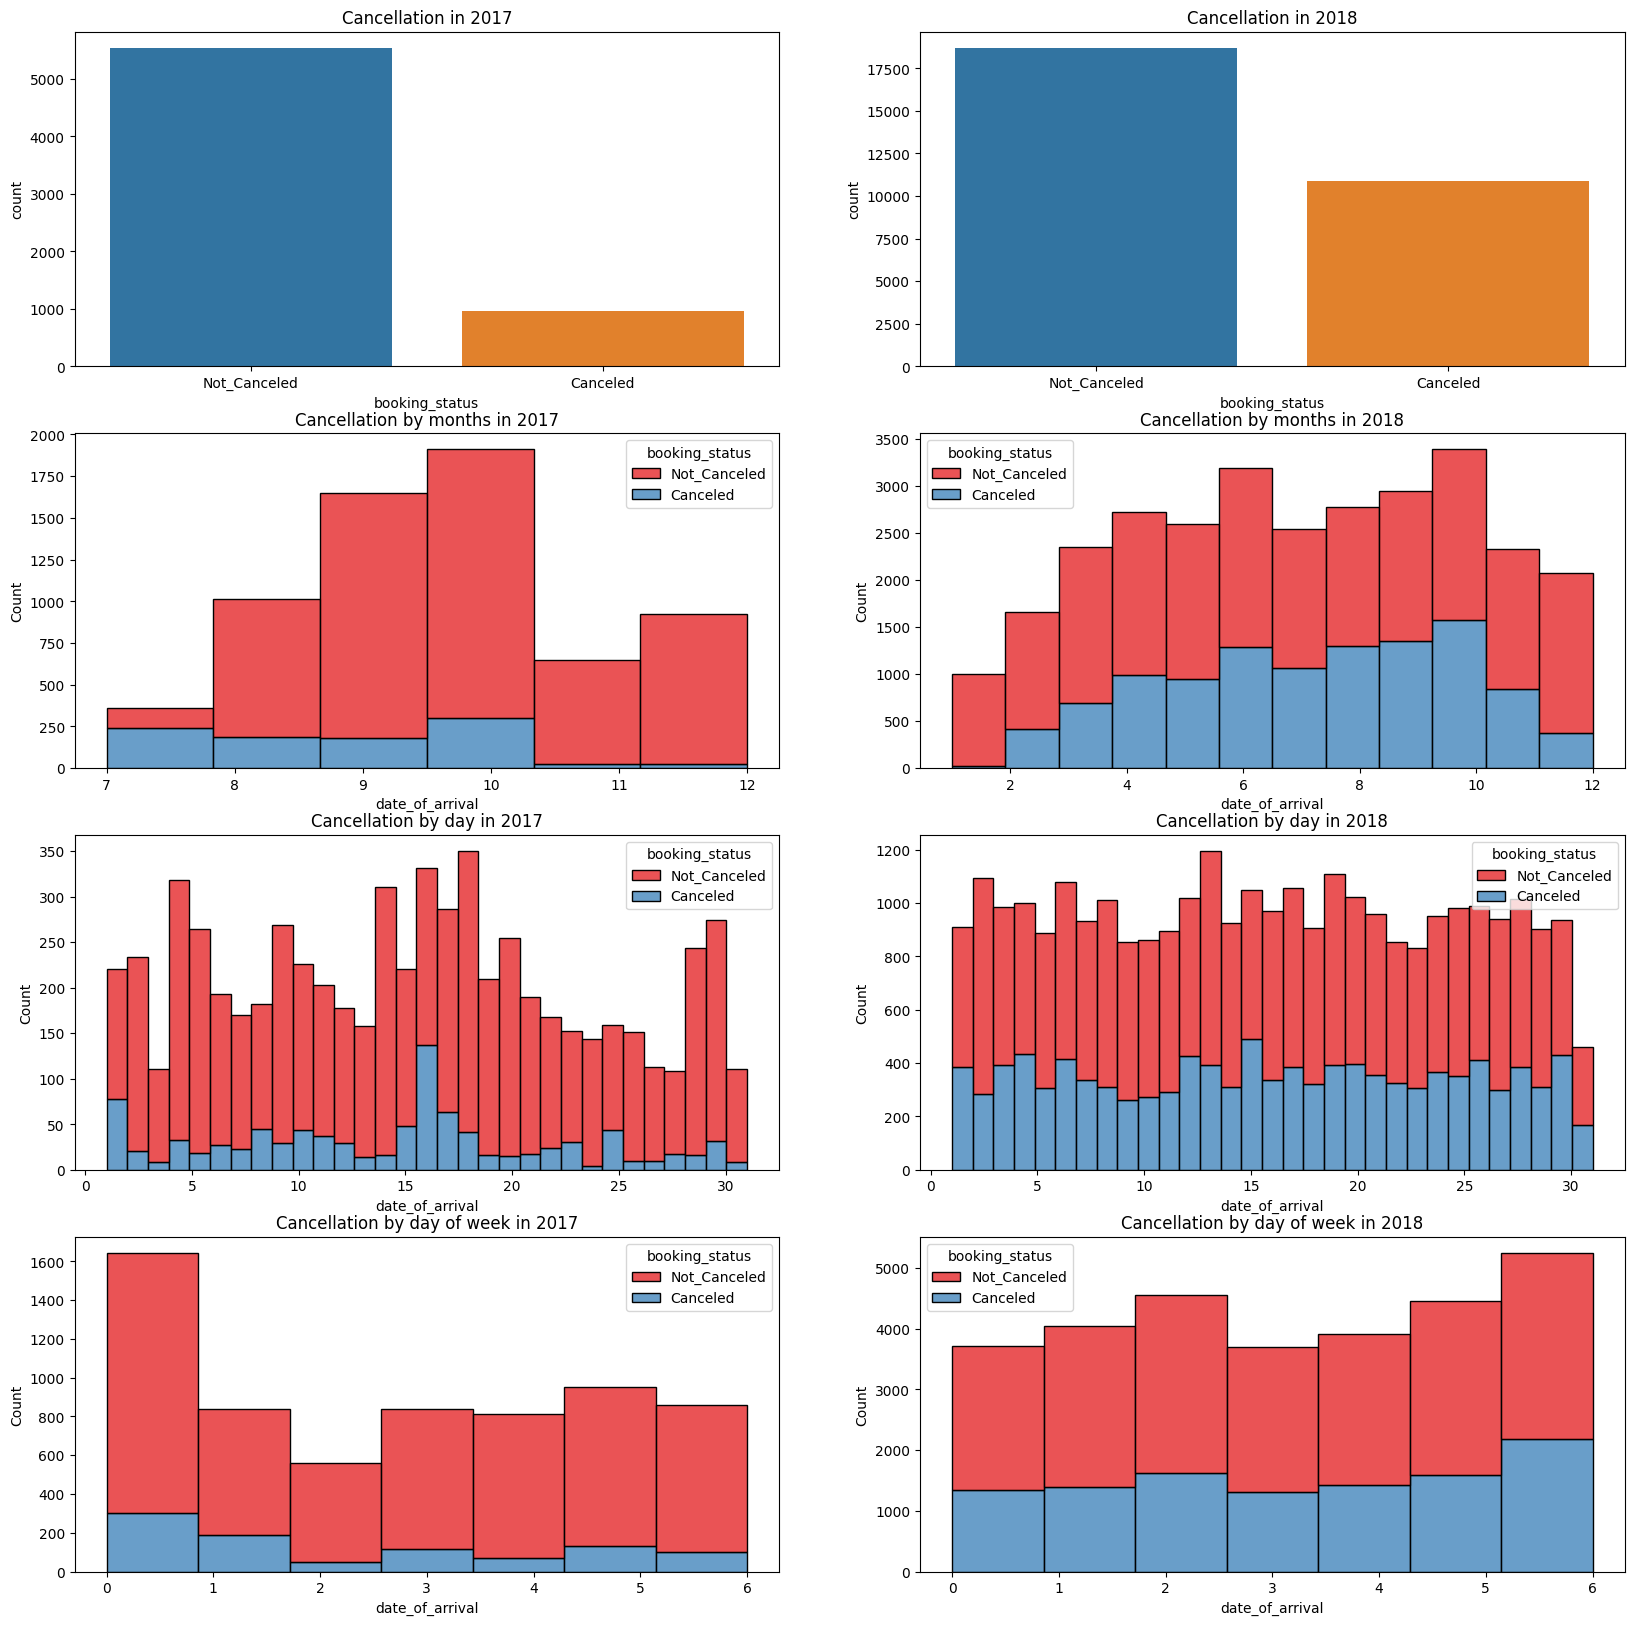

In [91]:
fig,ax = plt.subplots(4,2,figsize=(20,20))
df_2017 = data[data['date_of_arrival'].dt.year == 2017]
df_2018 = data[data['date_of_arrival'].dt.year == 2018]

#year wise
sns.countplot(x = df_2017['booking_status'], data = df_2017, ax=ax[0,0]).set_title('Cancellation in 2017')
sns.countplot(x = df_2018['booking_status'], data = df_2018, ax=ax[0,1]).set_title('Cancellation in 2018')

#month wise
sns.histplot(x = df_2017['date_of_arrival'].dt.month, data = df_2017, ax=ax[1,0], bins=6, hue = df_2017['booking_status'], palette = 'Set1', multiple = 'stack').set_title('Cancellation by months in 2017')
sns.histplot(x = df_2018['date_of_arrival'].dt.month, data = df_2018, ax=ax[1,1], bins=12, hue = df_2018['booking_status'], palette = 'Set1', multiple ='stack').set_title('Cancellation by months in 2018')

#date wise
sns.histplot(x = df_2017['date_of_arrival'].dt.day, data = df_2017, ax=ax[2,0], bins=31, hue = df_2017['booking_status'], palette = 'Set1', multiple='stack').set_title('Cancellation by day in 2017')
sns.histplot(x = df_2018['date_of_arrival'].dt.day, data = df_2018, ax=ax[2,1], bins=31, hue = df_2018['booking_status'], palette = 'Set1', multiple ='stack').set_title('Cancellation by day in 2018')

#day of week wise
sns.histplot(x = df_2017['date_of_arrival'].dt.dayofweek, data = df_2017, ax=ax[3,0], bins=7, hue = df_2017['booking_status'], palette = 'Set1', multiple = 'stack').set_title('Cancellation by day of week in 2017')
sns.histplot(x = df_2018['date_of_arrival'].dt.dayofweek, data = df_2018, ax=ax[3,1], bins=7, hue = df_2018['booking_status'], palette = 'Set1', multiple = 'stack').set_title('Cancellation by day of week in 2018')

The graphs above provide insights into reservation cancellations based on the dates the reservations were made. Despite the dataset mostly containing reservations from 2018, it's noteworthy that the number of reservations canceled in 2018 far exceeded those in 2017. In 2017, nearly 5500 reservations remained unaffected by cancellations, whereas nearly 1000 were canceled. In contrast, 2018 witnessed a significant increase, with 17,500 reservations going through as planned, but more than 10,000 reservations were canceled. This suggests a considerably higher rate of reservation cancellations in 2018.

Focusing on reservation cancellations by month, it's intriguing that both 2017 and 2018 experienced the highest number of cancellations in June and October. October, in particular, consistently stood out as the month with the majority of reservation cancellations in both years.

Additionally, let's delve into reservation cancellations by the date of the month. In 2017, the 16th day had the most cancellations, along with an unusual spike on the 1st of the month. In 2018, cancellations were concentrated primarily in the first and second weeks.

Shifting our attention to cancellations by the day of the week, Mondays in 2017 and Sundays in 2018 saw the highest number of cancellations.

# Services and Cancellation

Text(0.5, 1.0, 'Number of special requests')

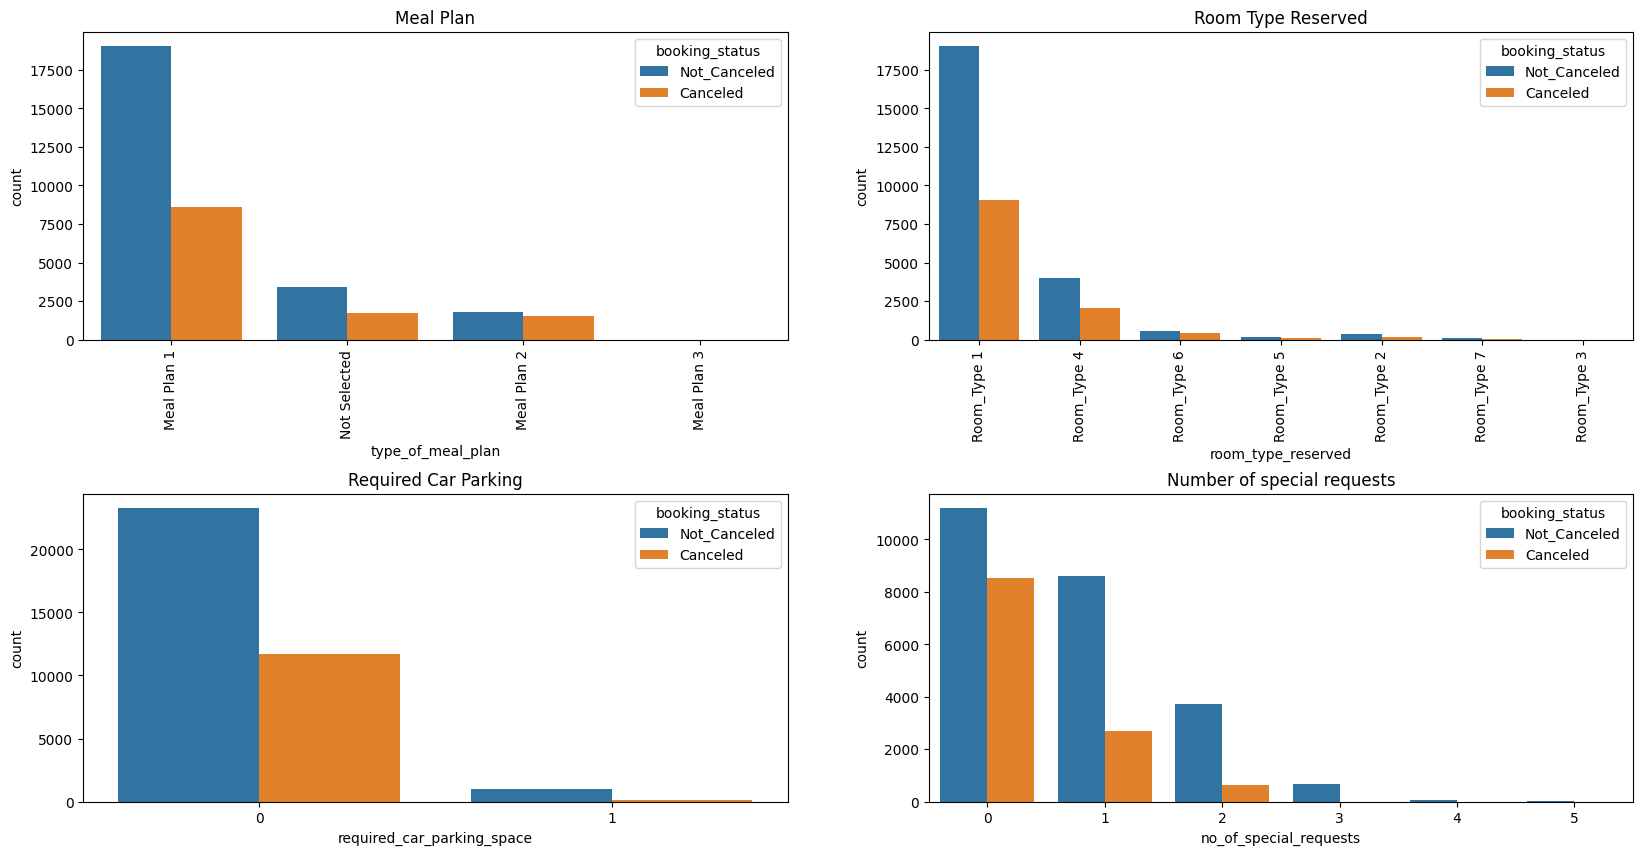

In [92]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

sns.countplot(x = 'type_of_meal_plan', data = data, ax=ax[0,0], hue = 'booking_status').set_title('Meal Plan')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'room_type_reserved', data = data, ax=ax[0,1], hue = 'booking_status').set_title('Room Type Reserved')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'required_car_parking_space', data = data, ax=ax[1,0], hue = 'booking_status').set_title('Required Car Parking')

sns.countplot(x = 'no_of_special_requests', data = data, ax=ax[1,1], hue = 'booking_status').set_title('Number of special requests')

In the above graphs, we can observe that the ratio of canceled and not canceled reservations is nearly the same for all the services. However, for some special requests, cancellations were reduced. In cases where special requests were made, it is evident that when the number of special requests increases, the cancellation rate is lower compared to cases with no special requests made. Therefore, I can conclude that the services provided by the hotel do not have any significant impact on reservation cancellations.

# Lead time and Cancellation

Text(0.5, 1.0, 'Lead Time in days')

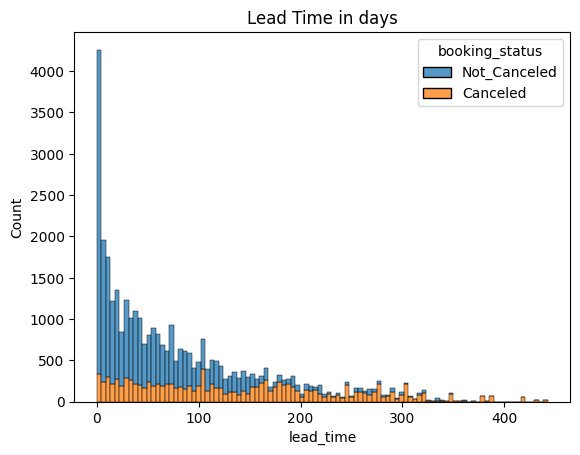

In [93]:
sns.histplot(x = 'lead_time', data = data, bins=100, hue = 'booking_status', multiple = 'stack').set_title('Lead Time in days')

The hypothesis made has proven to be true. With an increase in lead time, the number of reservation cancellations also increases. The difference in the number of reservations canceled and not canceled decreases as the lead time increases. This suggests that guests with very short lead times are less likely to cancel their reservations compared to those with longer lead times

# Market Segment and Cancellation

Text(0.5, 1.0, 'Market segment type')

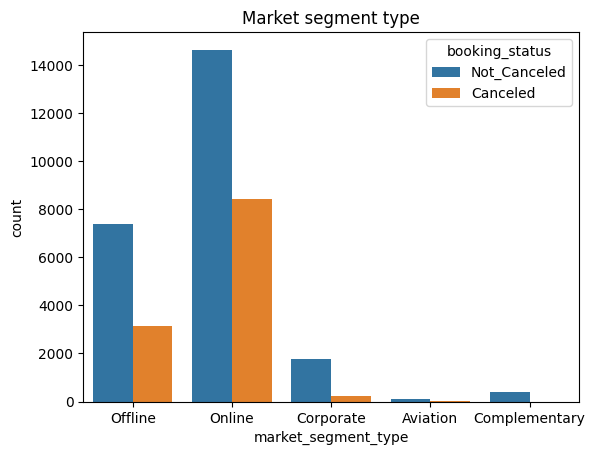

In [94]:
sns.countplot(x = "market_segment_type",data = data,hue = "booking_status").set_title("Market segment type")

This graph illustrates the market segments for reservations and cancellations. The majority of reservations are made through online platforms, consequently having the highest number of cancellations. The second most common market segment is offline, which exhibits a significant number of cancellations. Complementary booking has a low cancellation rate upon closer examination.

# Guest's previous experience and Cancellation

Text(0.5, 1.0, 'Repeated Guest')

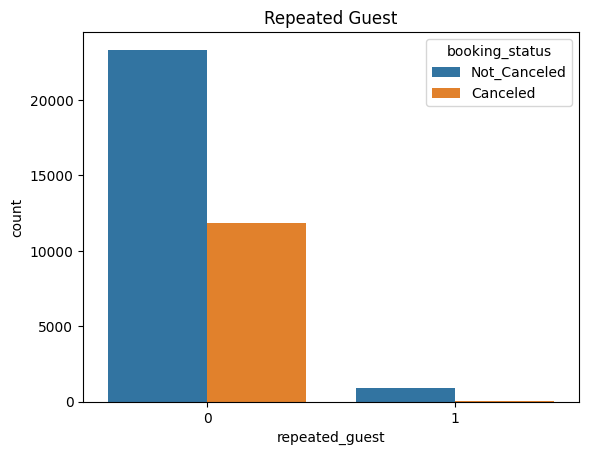

In [95]:
sns.countplot(x = 'repeated_guest', data = data, hue = 'booking_status').set_title('Repeated Guest')

Returning guests are significantly less likely to cancel reservations compared to new guests.

# Average room price and Cancellation

Text(0.5, 1.0, 'Average Room Price')

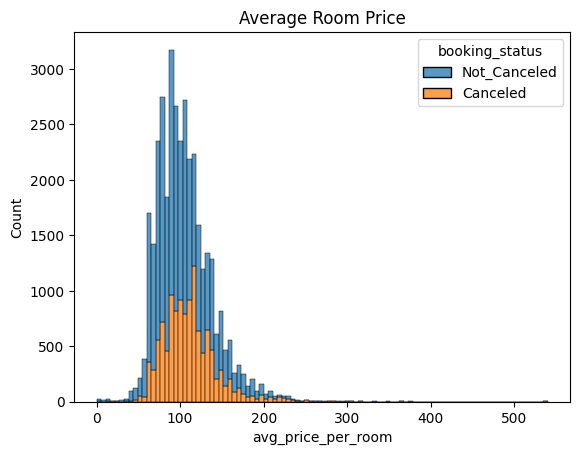

In [96]:
sns.histplot(x = 'avg_price_per_room', data = data, bins = 100, hue = 'booking_status', multiple = 'stack').set_title('Average Room Price')

Most of the room prices are between 75-150 and the number of reservations cancellation mostly occur in the same range. Therefore, there is no relation between the room price and reservation cancellation.

# Data Preprocessing Part 2

### Outlier removal using IQR

In [97]:
#columns for outlier removal
cols = ['lead_time', 'avg_price_per_room']

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
df = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

### Label Encoding

In [98]:
from sklearn.preprocessing import LabelEncoder
#label encoding object
le = LabelEncoder()

#columns to be encoded
cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

#label encoding
for col in cols:
    le.fit(data[col])
    data[col] = le.transform(data[col])
    print(col, data[col].unique())

type_of_meal_plan [0 3 1 2]
room_type_reserved [0 3 5 4 1 6 2]
market_segment_type [3 4 2 0 1]
booking_status [1 0]


### Feature Scaling

In [99]:
from sklearn.preprocessing import StandardScaler
#standardizing the data
scaler = StandardScaler()
data[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(data[['lead_time', 'avg_price_per_room']])

# Correlation Matrix Heatmap

<Axes: >

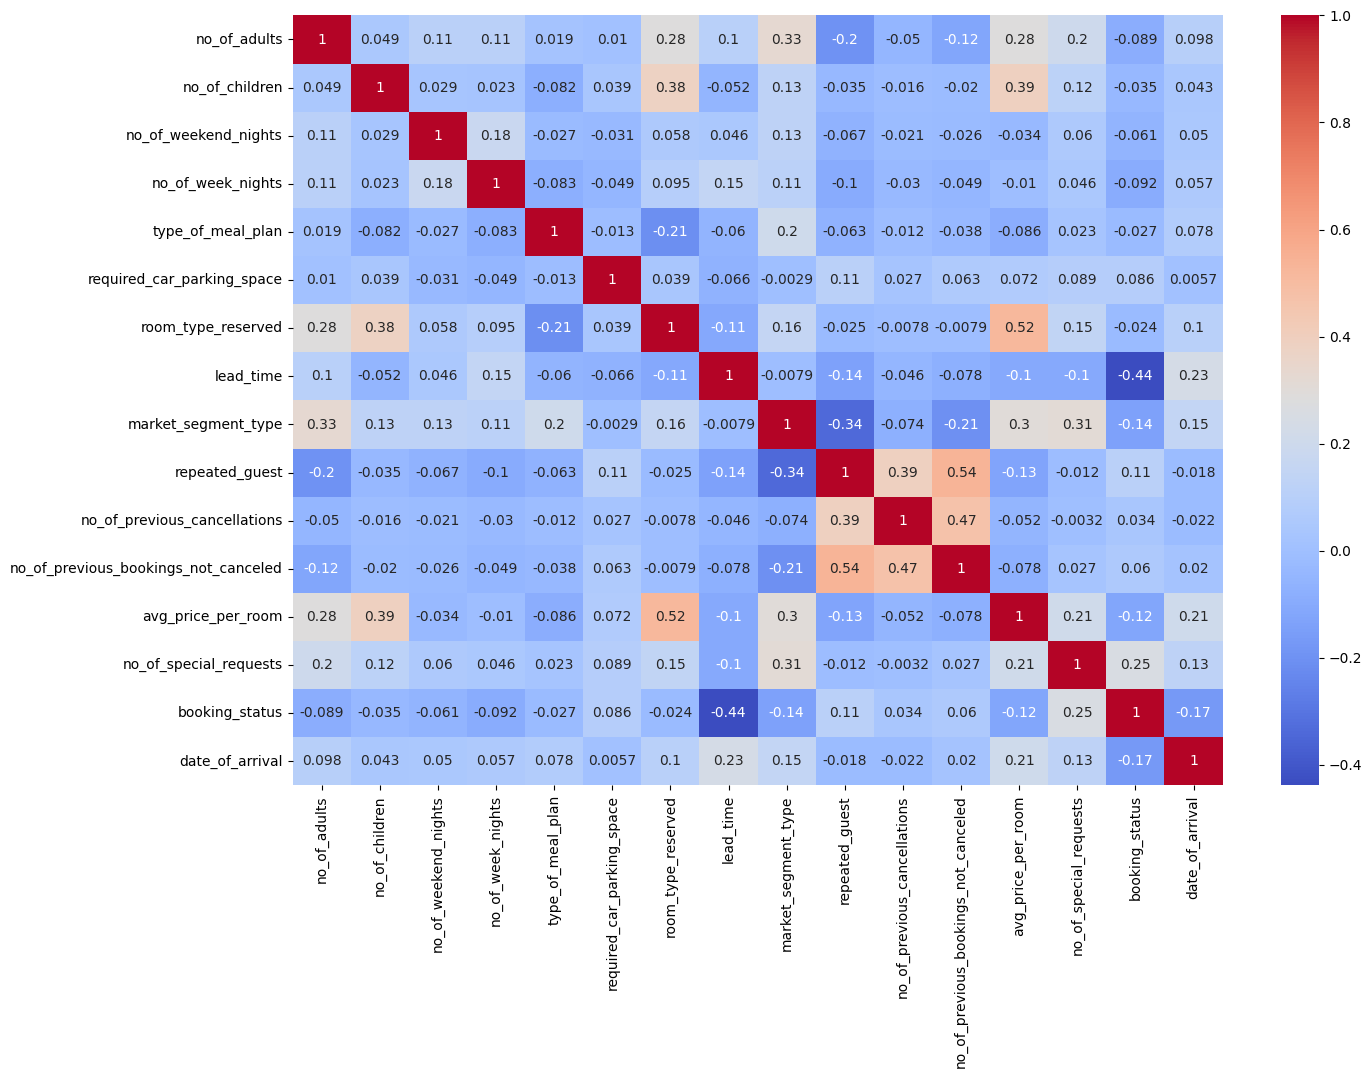

In [100]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [102]:
# Experienced issue with the model training due to date_of_arrival column
# hence dropping the date_of_arrival column.

data.drop(columns=['date_of_arrival'], inplace=True)

In [103]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,1.614171,3,0,0,0,-1.227377,0,1
1,2,0,2,3,3,0,0,-0.933137,4,0,0,0,0.049262,1,1
2,1,0,2,1,0,0,0,-0.979664,4,0,0,0,-1.380524,0,0
3,2,0,0,2,0,0,0,1.462961,4,0,0,0,-0.155343,0,0
4,2,0,1,1,3,0,0,-0.432981,4,0,0,0,-0.323806,0,0


## Train Test Split

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('booking_status', axis=1), data['booking_status'], test_size=0.2, random_state=42)

## Model Building

I will be using the following classification models:
- Decision Tree Classifier
- Random Forest Classifier
- Logistic Regression

#### Decision Tree Classifier

In [104]:
from sklearn.tree import DecisionTreeClassifier

#decision tree classifier Object
dtree = DecisionTreeClassifier()

#### Finding the best Hyperparameters using GridSearchCV

In [107]:
from sklearn.model_selection import GridSearchCV

#grid search parameters
grid_param = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state' : [0,42]
}

#grid search object
grid_search = GridSearchCV(estimator=dtree, param_grid=grid_param, cv=5, n_jobs=-1)

#fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

#best parameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 42}


In [108]:
#decision tree classifier object with best parameters
dtree = DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=42)

#Training the model
dtree.fit(X_train, y_train)

#Training accuracy
print(dtree.score(X_train, y_train))

#Predicting the test set results
d_pred = dtree.predict(X_test)

0.8630839017971537


### Random Forest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier

#random forest classifier object
rfc = RandomForestClassifier()

In [118]:
from sklearn.model_selection import GridSearchCV

#grid search parameters
grid_param = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state' : [0,42]
}

#grid search object
grid_search = GridSearchCV(estimator=rfc, param_grid=grid_param, cv=5, n_jobs=-1)

#fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

#best parameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [119]:
#random forest classifier object with best parameters
rfc = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=2, min_samples_split=2, random_state=42)

#Training the model
rfc.fit(X_train, y_train)

#Training accuracy
print(rfc.score(X_train, y_train))

#Predicting the test set results
r_pred = rfc.predict(X_test)

0.8506873506700371


#### Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression

#logistic regression object
logreg = LogisticRegression()

In [129]:
from sklearn.model_selection import GridSearchCV

#grid search parameters
grid_param = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'random_state' : [0,42]
}

#grid search object
grid_search = GridSearchCV(estimator=logreg, param_grid=grid_param, cv=5, n_jobs=-1)

#fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

#best parameters
print(grid_search.best_params_)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
630 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\ASUS\AppData\Local\Programs\Pytho

{'C': 1000, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs'}


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [140]:
#logistic regression object with best parameters
logreg = LogisticRegression(C=0.1, penalty='l2', random_state=0, solver='lbfgs')

#Training the model
logreg.fit(X_train, y_train)

#Training accuracy
print(logreg.score(X_train, y_train))



0.7982617126631809


In [144]:
#Predicting the test set results
l_pred = logreg.predict(X_test)
l_pred


array([1, 1, 1, ..., 1, 1, 1])

# Model Evaluation

### Confusion Matrix Heatmap

Text(0.5, 1.0, 'Logistic Regression')

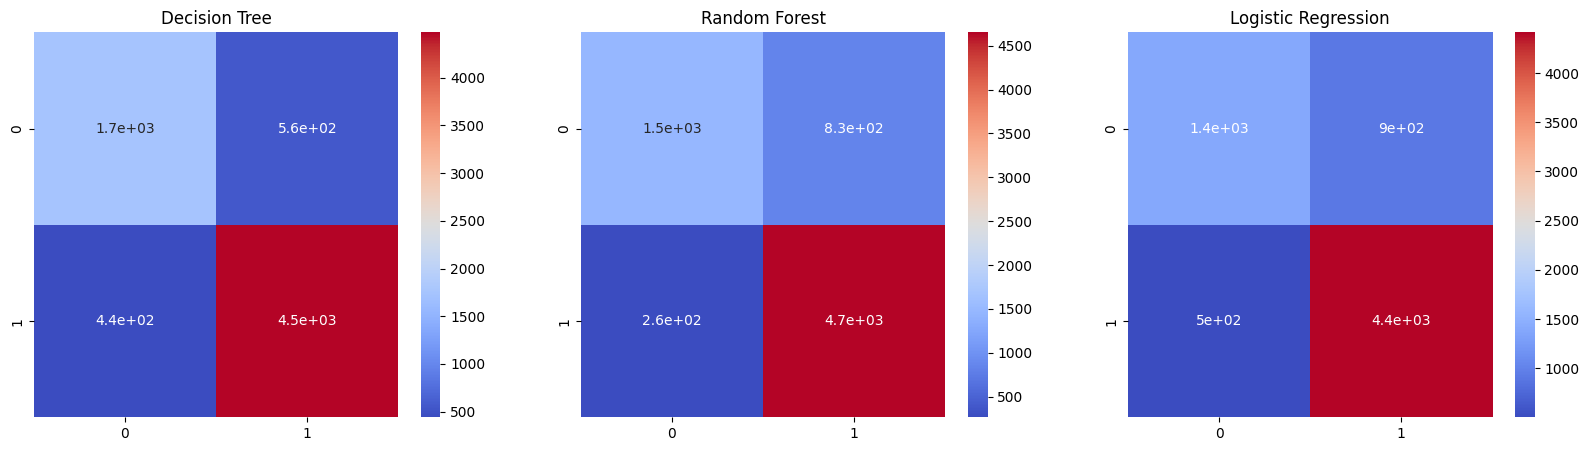

In [145]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,3,figsize=(20,5))

#decision tree
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='coolwarm', ax=ax[0]).set_title('Decision Tree')
#random forest
sns.heatmap(confusion_matrix(y_test, r_pred), annot=True, cmap='coolwarm', ax=ax[1]).set_title('Random Forest')
#logistic regression
sns.heatmap(confusion_matrix(y_test, l_pred), annot=True, cmap='coolwarm', ax=ax[2]).set_title('Logistic Regression')

### Classification Report

In [146]:
from sklearn.metrics import classification_report

#decision tree
print('Decision Tree')
print(classification_report(y_test, d_pred))
#random forest
print('Random Forest')
print(classification_report(y_test, r_pred))
#logistic regression
print('Logistic Regression')
print(classification_report(y_test, l_pred))

Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      2303
           1       0.89      0.91      0.90      4917

    accuracy                           0.86      7220
   macro avg       0.84      0.83      0.84      7220
weighted avg       0.86      0.86      0.86      7220

Random Forest
              precision    recall  f1-score   support

           0       0.85      0.64      0.73      2303
           1       0.85      0.95      0.89      4917

    accuracy                           0.85      7220
   macro avg       0.85      0.79      0.81      7220
weighted avg       0.85      0.85      0.84      7220

Logistic Regression
              precision    recall  f1-score   support

           0       0.74      0.61      0.67      2303
           1       0.83      0.90      0.86      4917

    accuracy                           0.81      7220
   macro avg       0.78      0.75      0.76      7220
weighted avg       0.80   

### Model Metrics

In [147]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

#decision tree
print('Decision Tree')
print('Accuracy Score: ', accuracy_score(y_test, d_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, d_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, d_pred))

print('\n')

#random forest
print('Random Forest')
print('Accuracy Score: ', accuracy_score(y_test, r_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, r_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, r_pred))

print('\n')

#logistic regression
print('Logistic Regression')
print('Accuracy Score: ', accuracy_score(y_test, l_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, l_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, l_pred))

Decision Tree
Accuracy Score:  0.8619113573407202
Mean Absolute Error:  0.13808864265927978
Mean Squared Error:  0.13808864265927978


Random Forest
Accuracy Score:  0.8483379501385041
Mean Absolute Error:  0.15166204986149584
Mean Squared Error:  0.15166204986149584


Logistic Regression
Accuracy Score:  0.8054016620498615
Mean Absolute Error:  0.1945983379501385
Mean Squared Error:  0.1945983379501385


### Model Comparison

Text(0.5, 1.0, 'Mean Squared Error')

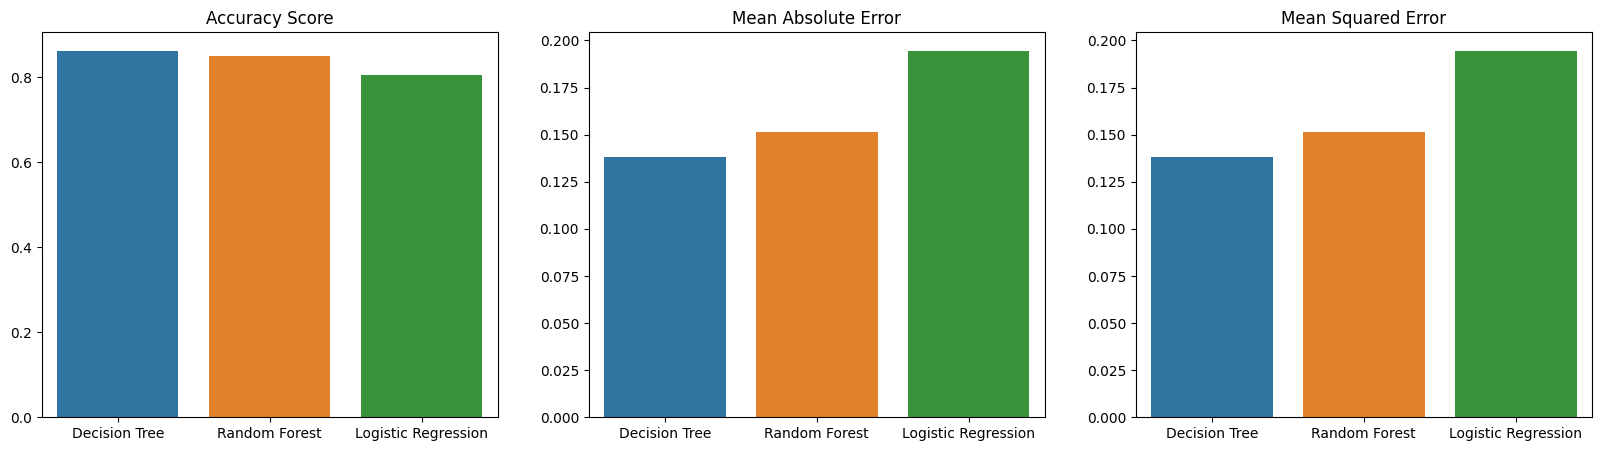

In [149]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
#Accuracy Score
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [accuracy_score(y_test, d_pred), accuracy_score(y_test, r_pred), accuracy_score(y_test, l_pred)], ax=ax[0]).set_title('Accuracy Score')
#Mean Absolute Error
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [mean_absolute_error(y_test, d_pred), mean_absolute_error(y_test, r_pred), mean_absolute_error(y_test, l_pred)], ax=ax[1]).set_title('Mean Absolute Error')
#Mean Squared Error
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [mean_squared_error(y_test, d_pred), mean_squared_error(y_test, r_pred), mean_squared_error(y_test, l_pred)], ax=ax[2]).set_title('Mean Squared Error')

### Feature Importance

Feature Importance from best two models

Text(0.5, 1.0, 'Decision Tree')

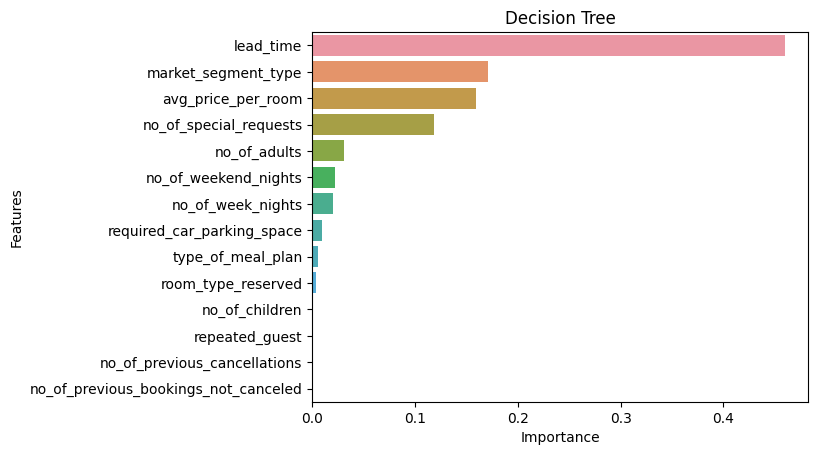

In [150]:
#decision tree
feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': dtree.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance).set_title('Decision Tree')

Text(0.5, 1.0, 'Random Forest')

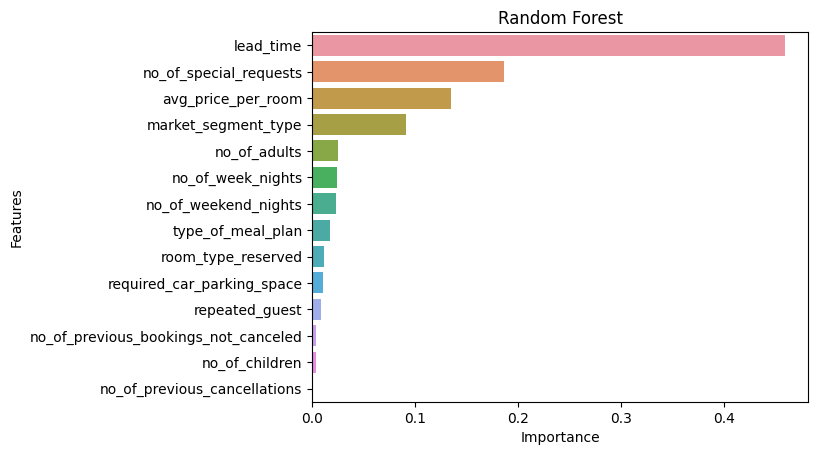

In [153]:
#random forest
feature_importance_rfc = pd.DataFrame({'Features':X_train.columns,
                                       'Importance':rfc.feature_importances_})
feature_importance_rfc.sort_values(by='Importance',ascending=False, inplace=True)
feature_importance_rfc.reset_index(drop=True, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance_rfc).set_title('Random Forest')


# Conclusion

After exploring the data and evaluating different models, I've found some key insights that can help the hotel improve its reservation process and reduce cancellations.

Firstly, most reservations are made for couples, typically 2 adults with no children. These reservations tend to have the highest cancellation rate. On the other hand, bookings with children involved are less likely to be canceled. Also, weekend reservations are more likely to stay intact compared to those for weekdays.

The year 2018 had a higher cancellation rate than 2017, with July and October being the peak months for cancellations. Surprisingly, the services chosen during reservations do not seem to influence cancellations significantly.

Lead time plays a crucial role in cancellations. Guests with shorter lead times tend to stick with their reservations, while those with longer lead times are more likely to cancel. Therefore, the hotel should consider accepting reservations with shorter lead times.

Reservations made through online platforms have the highest cancellation rates, indicating a need to enhance the hotel's online presence and reputation.

In terms of model performance, the Decision Tree Classifier outperformed other models with an 86% accuracy rate.

To sum it up, the hotel can reduce cancellations by focusing on shorter lead times, improving online visibility and reputation, and considering promotions or incentives for guests making reservations with children. These steps can enhance the guest experience and boost the hotel's overall success.

In [155]:
X_train.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')

### Prediction using the most accurate statistical model "Decision tree classifier"

In [158]:
# no_of_adults = int(input("Enter the number of adults: "))
# no_of_children = int(input("Enter the number of children: "))
# no_of_weekend_nights = int(input("Enter the number of weekend nights: "))
# no_of_week_nights = int(input("Enter the number of week nights: "))
# type_of_meal_plan = int(input("Enter the type of meal plan (0 for none, 1 for breakfast, 2 for half-board, 3 for full-board): "))
# required_car_parking_space = int(input("Enter 1 if car parking space is required, 0 otherwise: "))
# room_type_reserved = int(input("Enter the room type (0 for A, 1 for B, 2 for C): "))
# lead_time = int(input("Enter lead time in days: "))
# market_segment_type = int(input("Enter market segment type (0 for online, 1 for offline): "))
# repeated_guest = int(input("Enter 1 if repeated guest, 0 otherwise: "))
# no_of_previous_cancellations = int(input("Enter the number of previous cancellations: "))
# no_of_previous_bookings_not_canceled = int(input("Enter the number of previous bookings not canceled: "))
# avg_price_per_room = float(input("Enter the average price per room: "))
# no_of_special_requests = int(input("Enter the number of special requests: "))

# # Create a dictionary from user input
# user_data = {
#     'no_of_adults': [no_of_adults],
#     'no_of_children': [no_of_children],
#     'no_of_weekend_nights': [no_of_weekend_nights],
#     'no_of_week_nights': [no_of_week_nights],
#     'type_of_meal_plan': [type_of_meal_plan],
#     'required_car_parking_space': [required_car_parking_space],
#     'room_type_reserved': [room_type_reserved],
#     'lead_time': [lead_time],
#     'market_segment_type': [market_segment_type],
#     'repeated_guest': [repeated_guest],
#     'no_of_previous_cancellations': [no_of_previous_cancellations],
#     'no_of_previous_bookings_not_canceled': [no_of_previous_bookings_not_canceled],
#     'avg_price_per_room': [avg_price_per_room],
#     'no_of_special_requests': [no_of_special_requests]
# }

# # Convert the user input into a DataFrame
# user_df = pd.DataFrame(user_data)

# # Load your trained Decision Tree Classifier (clf) here
# # clf = load_model('your_model_filename.pkl')

# # Predict the outcome for the user input
# predicted_outcome = dtree.predict(user_df)
# prediction={0:"likelly not to cancell the reservation",
#             1:"Likely to cancell the resrvation"}


# prediction_mapping = {
#     0: "Likely not to cancel the reservation",
#     1: "Likely to cancel the reservation"
# }

# prediction_message = prediction_mapping.get(predicted_outcome[0], "Unknown")

# # Print the predicted outcome
# print("Predicted Outcome:", prediction_message)

Predicted Outcome: Likely not to cancel the reservation
